In [1]:
import tensorflow as tf
import numpy as np 
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt

In [3]:
mnist_base_path="/Users/zhouwencheng/Desktop/Grass/data/picture/mnist"
# 载入数据集
mnist = input_data.read_data_sets(mnist_base_path, one_hot=True)

Extracting ./data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# Parameter
learning_rate = 0.01
training_epochs = 20 # 五组训练
batch_size = 256
display_step = 1
examples_to_show = 10

keep_prob = 1

# Network Parameters
n_input = 784  # MNIST data input (img shape: 28*28)

In [5]:
"""
x : 输入的x值
in_size : 输入大小
out_size: 输出大小 
activator_func: 激活函数
"""
def add_fc_layer(x, in_size, out_size, activator_func = None):
    W = tf.Variable(tf.truncated_normal(shape = [in_size, out_size], stddev = 0.1))
    b = tf.Variable(tf.constant(0.1, shape = [out_size]))
    mul = tf.matmul(x, W) + b
    if activator_func:
        return activator_func(mul)
    else:
        return mul

In [18]:
# hidden layer settings
n_hidden_1 = 128 # 1st layer num features
n_hidden_2 = 64 # 2nd layer num features 

In [14]:
# Building the encoder
def encoder(x):  
    layer_1 = add_fc_layer(x, n_input, n_hidden_1, tf.nn.sigmoid)
    layer_2 = add_fc_layer(layer_1, n_hidden_1, n_hidden_2, tf.nn.sigmoid) 
    return layer_2
    
# Building the decoder
def decoder(x):
    layer_1 = add_fc_layer(x, n_hidden_2, n_hidden_1, tf.nn.sigmoid)
    layer_2 = add_fc_layer(layer_1, n_hidden_1, n_input, tf.nn.sigmoid) 
    return layer_2

In [15]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 28*28])  

# Construct model
encoder_op = encoder(x) # 64 Features
decoder_op = decoder(encoder_op) # 784 Features

# Prediction
y_pred = decoder_op	# After 
# Targets (Labels) are the input data.
y_true = x  # Before

In [16]:
# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Epoch: 0001 cost= 0.047035839
Epoch: 0002 cost= 0.028509028
Epoch: 0003 cost= 0.021316070
Epoch: 0004 cost= 0.018521918
Epoch: 0005 cost= 0.016209545
Epoch: 0006 cost= 0.013844875
Epoch: 0007 cost= 0.013131953
Epoch: 0008 cost= 0.011450130
Epoch: 0009 cost= 0.011301233
Epoch: 0010 cost= 0.010517797
Epoch: 0011 cost= 0.009134311
Epoch: 0012 cost= 0.009328615
Epoch: 0013 cost= 0.008454538
Epoch: 0014 cost= 0.007667188
Epoch: 0015 cost= 0.007985183
Epoch: 0016 cost= 0.007357247
Epoch: 0017 cost= 0.007946694
Epoch: 0018 cost= 0.007435599
Epoch: 0019 cost= 0.007115738
Epoch: 0020 cost= 0.006622505
Optimization Finished!


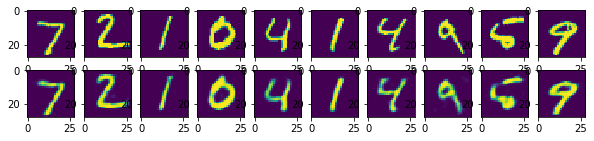

In [17]:
# Launch the graph
with tf.Session() as sess:
    # tf 马上就要废弃tf.initialize_all_variables()这种写法
    # 替换成下面:
    sess.run(tf.global_variables_initializer())
    total_batch = int(mnist.train.num_examples/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)  # max(x) = 1, min(x) = 0
            # Run optimization op (backprop) and cost op (to get loss value) 
            
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs})
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c))

    print("Optimization Finished!")
    
    # # Applying encode and decode over test set
    encode_decode = sess.run(
        y_pred, feed_dict={x: mnist.test.images[:examples_to_show]})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    plt.show()